In [6]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pandas_profiling

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
train = pd.read_csv('./assets/train.csv')
test = pd.read_csv('./assets/test.csv')
weather = pd.read_csv('./assets/weather.csv')
spray = pd.read_csv('./assets/spray.csv')

In [9]:
# from weather pdf documentaion 'M' = missing data

In [10]:
# convert all columns to lower case
weather.columns = map(str.lower, weather.columns)

In [11]:
weather.head()

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [12]:
weather.dtypes

station          int64
date            object
tmax             int64
tmin             int64
tavg            object
depart          object
dewpoint         int64
wetbulb         object
heat            object
cool            object
sunrise         object
sunset          object
codesum         object
depth           object
water1          object
snowfall        object
preciptotal     object
stnpressure     object
sealevel        object
resultspeed    float64
resultdir        int64
avgspeed        object
dtype: object

In [13]:
# change all temperature data into float type
weather['tmax'] = weather['tmax'].astype(float)
weather['tmin'] = weather['tmin'].astype(float)
weather['dewpoint'] = weather['dewpoint'].astype(float)

In [14]:
# convert date 
weather['date'] = pd.to_datetime(weather['date'])

In [15]:
weather.head()

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2007-05-01,83.0,50.0,67,14,51.0,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84.0,52.0,68,M,51.0,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59.0,42.0,51,-3,42.0,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60.0,43.0,52,M,42.0,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66.0,46.0,56,2,40.0,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [16]:
weather[weather['tavg'] == 'M']
# impute by taking tmax + tmin / 2

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
7,2,2007-05-04,78.0,51.0,M,M,42.0,50,M,M,-,-,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
505,2,2008-07-08,86.0,46.0,M,M,68.0,71,M,M,-,-,TS RA,M,M,M,0.28,29.16,29.80,7.4,24,8.3
675,2,2008-10-01,62.0,46.0,M,M,41.0,47,M,M,-,-,,M,M,M,0.00,29.30,29.96,10.9,33,11.0
1637,2,2011-07-22,100.0,71.0,M,M,70.0,74,M,M,-,-,TS TSRA BR,M,M,M,0.14,29.23,29.86,3.8,10,8.2
2067,2,2012-08-22,84.0,72.0,M,M,51.0,61,M,M,-,-,,M,M,M,0.00,29.39,M,4.7,19,M
2211,2,2013-05-02,71.0,42.0,M,M,39.0,45,M,M,-,-,,M,M,M,0.00,29.51,30.17,15.8,2,16.1
2501,2,2013-09-24,91.0,52.0,M,M,48.0,54,M,M,-,-,,M,M,M,0.00,29.33,30.00,5.8,9,7.7
2511,2,2013-09-29,84.0,53.0,M,M,48.0,54,M,M,-,-,RA BR,M,M,M,0.22,29.36,30.01,6.3,36,7.8
2525,2,2013-10-06,76.0,48.0,M,M,44.0,50,M,M,-,-,RA DZ BR,M,M,M,0.06,29.10,29.76,10.1,25,10.6
2579,2,2014-05-02,80.0,47.0,M,M,43.0,47,M,M,-,-,RA,M,M,M,0.04,29.10,29.79,10.7,23,11.9


In [17]:
# instead of using tavg with rounding up, we will impute all with float type to display 0.5 decimal
weather['tavg'] = (weather['tmax'] + weather['tmin']) / 2

In [18]:
weather['tavg'] = weather['tavg'].astype(float)

In [19]:
# departure of temperature from normal
# since there is no easy way to impute the missing data we will treat any missing data as 0
# however, there is a huge number of rows which are missing data 1472 we might consider dropping it at features selection
weather[weather['depart'] == 'M']

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
1,2,2007-05-01,84.0,52.0,68.0,M,51.0,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
3,2,2007-05-02,60.0,43.0,51.5,M,42.0,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
5,2,2007-05-03,67.0,48.0,57.5,M,40.0,50,7,0,-,-,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
7,2,2007-05-04,78.0,51.0,64.5,M,42.0,50,M,M,-,-,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
9,2,2007-05-05,66.0,54.0,60.0,M,39.0,50,5,0,-,-,,M,M,M,T,29.46,30.09,11.2,7,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2,2014-10-27,79.0,54.0,66.5,M,52.0,59,0,2,-,-,RA,M,M,M,0.02,29.00,29.67,12.7,19,13.6
2937,2,2014-10-28,66.0,48.0,57.0,M,40.0,48,8,0,-,-,RA,M,M,M,0.03,29.23,29.85,14.0,26,14.6
2939,2,2014-10-29,49.0,40.0,44.5,M,34.0,42,20,0,-,-,,M,M,M,0.00,29.42,30.07,8.5,29,9.0
2941,2,2014-10-30,53.0,37.0,45.0,M,35.0,42,20,0,-,-,RA,M,M,M,T,29.41,30.10,5.9,23,6.5


In [20]:
weather['depart'] = weather['depart'].apply(lambda x: 0 if x == 'M' else x).astype(float)

In [21]:
weather[weather['wetbulb'] == 'M']

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
848,1,2009-06-26,86.0,69.0,77.5,7.0,60.0,M,0,13,0418,1931,,0,M,0.0,0.00,M,29.85,6.4,4,8.2
2410,1,2013-08-10,81.0,64.0,72.5,0.0,57.0,M,0,8,0454,1900,,0,M,0.0,0.00,M,30.08,5.3,5,6.5
2412,1,2013-08-11,81.0,60.0,70.5,-2.0,61.0,M,0,6,0455,1859,RA,0,M,0.0,0.01,29.35,30.07,2.0,27,3.0
2415,2,2013-08-12,85.0,69.0,77.0,0.0,63.0,M,0,12,-,-,RA,M,M,M,0.66,29.27,29.92,4.5,26,7.7


In [22]:
weather['wetbulb'] = weather['wetbulb'].apply(lambda x: np.nan if x == 'M' else x).astype(float)

In [23]:
weather[weather['heat'] == 'M']

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
7,2,2007-05-04,78.0,51.0,64.5,0.0,42.0,50.0,M,M,-,-,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
505,2,2008-07-08,86.0,46.0,66.0,0.0,68.0,71.0,M,M,-,-,TS RA,M,M,M,0.28,29.16,29.80,7.4,24,8.3
675,2,2008-10-01,62.0,46.0,54.0,0.0,41.0,47.0,M,M,-,-,,M,M,M,0.00,29.30,29.96,10.9,33,11.0
1637,2,2011-07-22,100.0,71.0,85.5,0.0,70.0,74.0,M,M,-,-,TS TSRA BR,M,M,M,0.14,29.23,29.86,3.8,10,8.2
2067,2,2012-08-22,84.0,72.0,78.0,0.0,51.0,61.0,M,M,-,-,,M,M,M,0.00,29.39,M,4.7,19,M
2211,2,2013-05-02,71.0,42.0,56.5,0.0,39.0,45.0,M,M,-,-,,M,M,M,0.00,29.51,30.17,15.8,2,16.1
2501,2,2013-09-24,91.0,52.0,71.5,0.0,48.0,54.0,M,M,-,-,,M,M,M,0.00,29.33,30.00,5.8,9,7.7
2511,2,2013-09-29,84.0,53.0,68.5,0.0,48.0,54.0,M,M,-,-,RA BR,M,M,M,0.22,29.36,30.01,6.3,36,7.8
2525,2,2013-10-06,76.0,48.0,62.0,0.0,44.0,50.0,M,M,-,-,RA DZ BR,M,M,M,0.06,29.10,29.76,10.1,25,10.6
2579,2,2014-05-02,80.0,47.0,63.5,0.0,43.0,47.0,M,M,-,-,RA,M,M,M,0.04,29.10,29.79,10.7,23,11.9


In [24]:
weather['heat'] = weather['heat'].apply(lambda x: np.nan if x == 'M' else x).astype(float)

In [25]:
weather[weather['cool'] == 'M']

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
7,2,2007-05-04,78.0,51.0,64.5,0.0,42.0,50.0,NaN,M,-,-,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
505,2,2008-07-08,86.0,46.0,66.0,0.0,68.0,71.0,NaN,M,-,-,TS RA,M,M,M,0.28,29.16,29.80,7.4,24,8.3
675,2,2008-10-01,62.0,46.0,54.0,0.0,41.0,47.0,NaN,M,-,-,,M,M,M,0.00,29.30,29.96,10.9,33,11.0
1637,2,2011-07-22,100.0,71.0,85.5,0.0,70.0,74.0,NaN,M,-,-,TS TSRA BR,M,M,M,0.14,29.23,29.86,3.8,10,8.2
2067,2,2012-08-22,84.0,72.0,78.0,0.0,51.0,61.0,NaN,M,-,-,,M,M,M,0.00,29.39,M,4.7,19,M
2211,2,2013-05-02,71.0,42.0,56.5,0.0,39.0,45.0,NaN,M,-,-,,M,M,M,0.00,29.51,30.17,15.8,2,16.1
2501,2,2013-09-24,91.0,52.0,71.5,0.0,48.0,54.0,NaN,M,-,-,,M,M,M,0.00,29.33,30.00,5.8,9,7.7
2511,2,2013-09-29,84.0,53.0,68.5,0.0,48.0,54.0,NaN,M,-,-,RA BR,M,M,M,0.22,29.36,30.01,6.3,36,7.8
2525,2,2013-10-06,76.0,48.0,62.0,0.0,44.0,50.0,NaN,M,-,-,RA DZ BR,M,M,M,0.06,29.10,29.76,10.1,25,10.6
2579,2,2014-05-02,80.0,47.0,63.5,0.0,43.0,47.0,NaN,M,-,-,RA,M,M,M,0.04,29.10,29.79,10.7,23,11.9


In [26]:
weather['cool'] = weather['cool'].apply(lambda x: np.nan if x == 'M' else x).astype(float)

In [27]:
# we will leave both sunrise and sunset as it for now
weather[weather['sunrise'] == '-']

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
1,2,2007-05-01,84.0,52.0,68.0,0.0,51.0,57.0,0.0,3.0,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
3,2,2007-05-02,60.0,43.0,51.5,0.0,42.0,47.0,13.0,0.0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
5,2,2007-05-03,67.0,48.0,57.5,0.0,40.0,50.0,7.0,0.0,-,-,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
7,2,2007-05-04,78.0,51.0,64.5,0.0,42.0,50.0,NaN,NaN,-,-,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
9,2,2007-05-05,66.0,54.0,60.0,0.0,39.0,50.0,5.0,0.0,-,-,,M,M,M,T,29.46,30.09,11.2,7,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2,2014-10-27,79.0,54.0,66.5,0.0,52.0,59.0,0.0,2.0,-,-,RA,M,M,M,0.02,29.00,29.67,12.7,19,13.6
2937,2,2014-10-28,66.0,48.0,57.0,0.0,40.0,48.0,8.0,0.0,-,-,RA,M,M,M,0.03,29.23,29.85,14.0,26,14.6
2939,2,2014-10-29,49.0,40.0,44.5,0.0,34.0,42.0,20.0,0.0,-,-,,M,M,M,0.00,29.42,30.07,8.5,29,9.0
2941,2,2014-10-30,53.0,37.0,45.0,0.0,35.0,42.0,20.0,0.0,-,-,RA,M,M,M,T,29.41,30.10,5.9,23,6.5


In [28]:
weather[weather['sunset'] == '-']

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
1,2,2007-05-01,84.0,52.0,68.0,0.0,51.0,57.0,0.0,3.0,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
3,2,2007-05-02,60.0,43.0,51.5,0.0,42.0,47.0,13.0,0.0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
5,2,2007-05-03,67.0,48.0,57.5,0.0,40.0,50.0,7.0,0.0,-,-,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
7,2,2007-05-04,78.0,51.0,64.5,0.0,42.0,50.0,NaN,NaN,-,-,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
9,2,2007-05-05,66.0,54.0,60.0,0.0,39.0,50.0,5.0,0.0,-,-,,M,M,M,T,29.46,30.09,11.2,7,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2,2014-10-27,79.0,54.0,66.5,0.0,52.0,59.0,0.0,2.0,-,-,RA,M,M,M,0.02,29.00,29.67,12.7,19,13.6
2937,2,2014-10-28,66.0,48.0,57.0,0.0,40.0,48.0,8.0,0.0,-,-,RA,M,M,M,0.03,29.23,29.85,14.0,26,14.6
2939,2,2014-10-29,49.0,40.0,44.5,0.0,34.0,42.0,20.0,0.0,-,-,,M,M,M,0.00,29.42,30.07,8.5,29,9.0
2941,2,2014-10-30,53.0,37.0,45.0,0.0,35.0,42.0,20.0,0.0,-,-,RA,M,M,M,T,29.41,30.10,5.9,23,6.5


In [29]:
# has 1609 empty rows can consider to drop the columns when doing feature selection
weather[weather['codesum'] == ' ']

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2007-05-01,83.0,50.0,66.5,14.0,51.0,56.0,0.0,2.0,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84.0,52.0,68.0,0.0,51.0,57.0,0.0,3.0,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
4,1,2007-05-03,66.0,46.0,56.0,2.0,40.0,48.0,9.0,0.0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
7,2,2007-05-04,78.0,51.0,64.5,0.0,42.0,50.0,NaN,NaN,-,-,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
8,1,2007-05-05,66.0,53.0,59.5,5.0,38.0,49.0,5.0,0.0,0443,1853,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934,1,2014-10-27,77.0,51.0,64.0,16.0,51.0,58.0,1.0,0.0,0618,1653,,0,M,0.0,0.00,28.92,29.66,12.0,19,12.9
2936,1,2014-10-28,68.0,45.0,56.5,10.0,38.0,47.0,8.0,0.0,0619,1651,,0,M,0.0,T,29.15,29.85,14.8,26,15.6
2938,1,2014-10-29,49.0,36.0,42.5,-4.0,32.0,40.0,22.0,0.0,0620,1650,,0,M,0.0,0.00,29.36,30.06,9.5,29,9.9
2939,2,2014-10-29,49.0,40.0,44.5,0.0,34.0,42.0,20.0,0.0,-,-,,M,M,M,0.00,29.42,30.07,8.5,29,9.0


In [30]:
weather['codesum'].unique()

array([' ', 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'TSRA RA BR', 'RA VCTS',
       'TSRA RA', 'RA HZ', 'TSRA RA BR HZ', 'TSRA BR HZ', 'RA BR HZ VCTS',
       'TSRA RA HZ', 'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU',
       'TSRA RA HZ FU', 'BR HZ FU', 'TSRA RA VCTS', 'HZ VCTS', 'TSRA HZ',
       'VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS', 'TS TSRA RA BR HZ VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'TS TSRA BR HZ', 'RA BR HZ',
       'TSRA RA DZ BR HZ', 'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA',
       'TS TSRA RA BR VCTS', 'TS TSRA BR', 'TS RA', 'RA BCFG BR',
       'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TS TSRA RA HZ', 'TSRA RA FG+ FG BR',
       'TSRA DZ FG+ FG BR HZ', 'TS BR', 'RA BR SQ', 'TS TSRA',
       'TSRA RA BR HZ VCTS', 'BR VCTS', 'TS', 'FG+ BR HZ', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR HZ', 'RA BR FU', 'TS BR HZ', 'DZ',
       'FG+ BR', 'FG+ FG BR', 'FG+ MIFG BR', 'TSRA RA FG BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG 

In [31]:
# we can observer that majority of weather types is 'RA' which is rain and this is captured in precipitation data
# further strengthen the point that we can drop the entire column
weather[weather['codesum'] == 'RA']

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
6,1,2007-05-04,66.0,49.0,57.5,4.0,41.0,50.0,7.0,0.0,0444,1852,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
12,1,2007-05-07,83.0,47.0,65.0,10.0,41.0,54.0,0.0,0.0,0441,1856,RA,0,M,0.0,T,29.38,30.12,8.6,18,10.5
54,1,2007-05-28,79.0,50.0,64.5,2.0,47.0,56.0,0.0,0.0,0421,1916,RA,0,M,0.0,T,29.43,30.15,4.8,10,5.3
72,1,2007-06-06,71.0,44.0,57.5,-8.0,48.0,55.0,7.0,0.0,0417,1923,RA,0,M,0.0,0.01,29.07,29.81,10.8,17,11.4
73,2,2007-06-06,73.0,48.0,60.5,0.0,47.0,55.0,4.0,0.0,-,-,RA,M,M,M,T,29.13,29.82,9.6,15,10.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2891,2,2014-10-05,56.0,42.0,49.0,0.0,36.0,44.0,16.0,0.0,-,-,RA,M,M,M,T,29.02,29.70,10.1,23,10.7
2917,2,2014-10-18,52.0,39.0,45.5,0.0,40.0,44.0,19.0,0.0,-,-,RA,M,M,M,0.02,29.44,30.08,7.6,34,8.7
2935,2,2014-10-27,79.0,54.0,66.5,0.0,52.0,59.0,0.0,2.0,-,-,RA,M,M,M,0.02,29.00,29.67,12.7,19,13.6
2937,2,2014-10-28,66.0,48.0,57.0,0.0,40.0,48.0,8.0,0.0,-,-,RA,M,M,M,0.03,29.23,29.85,14.0,26,14.6


In [32]:
# depth is either missing or 0 hence it is not meaningful we can drop this column
weather['depth'].value_counts()

0    1472
M    1472
Name: depth, dtype: int64

In [33]:
# drop this column since there is no available data at all
weather['water1'].value_counts()

M    2944
Name: water1, dtype: int64

In [34]:
# 'T' = trace more than 0 but too small to be measure from wiki https://en.wikipedia.org/wiki/Trace_(precipitation)
# we can consider to impute with 0.1 for snow or 0.01 for rain since it's in the USA
# alternatively we can just convert both to categorical columns for snowfall and precipitation

# for snowfall almost all the data suggest that there is no snowfall
weather['snowfall'].value_counts()

M      1472
0.0    1459
  T      12
0.1       1
Name: snowfall, dtype: int64

In [35]:
weather['snowfall'] = weather['snowfall'].str.strip()

In [36]:
weather[weather['snowfall'] == 'M']

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
1,2,2007-05-01,84.0,52.0,68.0,0.0,51.0,57.0,0.0,3.0,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
3,2,2007-05-02,60.0,43.0,51.5,0.0,42.0,47.0,13.0,0.0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
5,2,2007-05-03,67.0,48.0,57.5,0.0,40.0,50.0,7.0,0.0,-,-,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
7,2,2007-05-04,78.0,51.0,64.5,0.0,42.0,50.0,NaN,NaN,-,-,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
9,2,2007-05-05,66.0,54.0,60.0,0.0,39.0,50.0,5.0,0.0,-,-,,M,M,M,T,29.46,30.09,11.2,7,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2,2014-10-27,79.0,54.0,66.5,0.0,52.0,59.0,0.0,2.0,-,-,RA,M,M,M,0.02,29.00,29.67,12.7,19,13.6
2937,2,2014-10-28,66.0,48.0,57.0,0.0,40.0,48.0,8.0,0.0,-,-,RA,M,M,M,0.03,29.23,29.85,14.0,26,14.6
2939,2,2014-10-29,49.0,40.0,44.5,0.0,34.0,42.0,20.0,0.0,-,-,,M,M,M,0.00,29.42,30.07,8.5,29,9.0
2941,2,2014-10-30,53.0,37.0,45.0,0.0,35.0,42.0,20.0,0.0,-,-,RA,M,M,M,T,29.41,30.10,5.9,23,6.5


In [37]:
weather['snowfall'] = weather['snowfall'].apply(lambda x: np.nan if x == 'M' else x)

In [38]:
weather['snowfall'].value_counts()

0.0    1459
T        12
0.1       1
Name: snowfall, dtype: int64

In [39]:
weather['snowfall'] = weather['snowfall'].apply(lambda x: 0.1 if x == 'T' else x).astype(float)

In [40]:
weather['snowfall'].value_counts()

0.0    1459
0.1      13
Name: snowfall, dtype: int64

In [41]:
# for preciptotal since the smallest value is 0.01 which means this can be measured, it won't makes sense to impute 0.01
# as this will muddy the data we can consider 0.005
weather['preciptotal'].value_counts()

0.00    1577
  T      318
0.01     127
0.02      63
0.03      46
        ... 
1.75       1
2.24       1
1.30       1
1.14       1
1.24       1
Name: preciptotal, Length: 168, dtype: int64

In [42]:
weather['preciptotal'].unique()

array(['0.00', '  T', '0.13', '0.02', '0.38', '0.60', '0.14', '0.07',
       '0.11', '0.09', '1.01', '0.28', '0.04', '0.08', '0.01', '0.53',
       '0.19', '0.21', '0.32', '0.39', '0.31', '0.42', '0.27', '0.16',
       '0.58', '0.93', '0.05', '0.34', '0.15', '0.35', 'M', '0.40',
       '0.66', '0.30', '0.24', '0.43', '1.55', '0.92', '0.89', '0.17',
       '0.03', '1.43', '0.97', '0.26', '1.31', '0.06', '0.46', '0.29',
       '0.23', '0.41', '0.45', '0.83', '1.33', '0.91', '0.48', '0.37',
       '0.88', '2.35', '1.96', '0.20', '0.25', '0.18', '0.67', '0.36',
       '0.33', '1.28', '0.74', '0.76', '0.71', '0.95', '1.46', '0.12',
       '0.52', '0.64', '0.22', '1.24', '0.72', '0.73', '0.65', '1.61',
       '1.22', '0.50', '1.05', '2.43', '0.59', '2.90', '2.68', '1.23',
       '0.62', '6.64', '3.07', '1.44', '1.75', '0.82', '0.80', '0.86',
       '0.63', '0.55', '1.03', '0.70', '1.73', '1.38', '0.44', '1.14',
       '1.07', '3.97', '0.87', '0.78', '1.12', '0.68', '0.10', '0.61',
       '0.

In [43]:
weather['preciptotal'] = weather['preciptotal'].str.strip()

In [44]:
weather['preciptotal'].unique()

array(['0.00', 'T', '0.13', '0.02', '0.38', '0.60', '0.14', '0.07',
       '0.11', '0.09', '1.01', '0.28', '0.04', '0.08', '0.01', '0.53',
       '0.19', '0.21', '0.32', '0.39', '0.31', '0.42', '0.27', '0.16',
       '0.58', '0.93', '0.05', '0.34', '0.15', '0.35', 'M', '0.40',
       '0.66', '0.30', '0.24', '0.43', '1.55', '0.92', '0.89', '0.17',
       '0.03', '1.43', '0.97', '0.26', '1.31', '0.06', '0.46', '0.29',
       '0.23', '0.41', '0.45', '0.83', '1.33', '0.91', '0.48', '0.37',
       '0.88', '2.35', '1.96', '0.20', '0.25', '0.18', '0.67', '0.36',
       '0.33', '1.28', '0.74', '0.76', '0.71', '0.95', '1.46', '0.12',
       '0.52', '0.64', '0.22', '1.24', '0.72', '0.73', '0.65', '1.61',
       '1.22', '0.50', '1.05', '2.43', '0.59', '2.90', '2.68', '1.23',
       '0.62', '6.64', '3.07', '1.44', '1.75', '0.82', '0.80', '0.86',
       '0.63', '0.55', '1.03', '0.70', '1.73', '1.38', '0.44', '1.14',
       '1.07', '3.97', '0.87', '0.78', '1.12', '0.68', '0.10', '0.61',
       '0.54

In [45]:
weather['preciptotal'] = weather['preciptotal'].apply(lambda x: np.nan if x == 'M' else x)

In [46]:
weather['preciptotal'].unique()

array(['0.00', 'T', '0.13', '0.02', '0.38', '0.60', '0.14', '0.07',
       '0.11', '0.09', '1.01', '0.28', '0.04', '0.08', '0.01', '0.53',
       '0.19', '0.21', '0.32', '0.39', '0.31', '0.42', '0.27', '0.16',
       '0.58', '0.93', '0.05', '0.34', '0.15', '0.35', nan, '0.40',
       '0.66', '0.30', '0.24', '0.43', '1.55', '0.92', '0.89', '0.17',
       '0.03', '1.43', '0.97', '0.26', '1.31', '0.06', '0.46', '0.29',
       '0.23', '0.41', '0.45', '0.83', '1.33', '0.91', '0.48', '0.37',
       '0.88', '2.35', '1.96', '0.20', '0.25', '0.18', '0.67', '0.36',
       '0.33', '1.28', '0.74', '0.76', '0.71', '0.95', '1.46', '0.12',
       '0.52', '0.64', '0.22', '1.24', '0.72', '0.73', '0.65', '1.61',
       '1.22', '0.50', '1.05', '2.43', '0.59', '2.90', '2.68', '1.23',
       '0.62', '6.64', '3.07', '1.44', '1.75', '0.82', '0.80', '0.86',
       '0.63', '0.55', '1.03', '0.70', '1.73', '1.38', '0.44', '1.14',
       '1.07', '3.97', '0.87', '0.78', '1.12', '0.68', '0.10', '0.61',
       '0.54

In [47]:
weather['preciptotal'] = weather['preciptotal'].apply(lambda x: 0.005 if x == 'T' else x).astype(float)

In [48]:
weather['preciptotal'].value_counts()

0.000    1577
0.005     318
0.010     127
0.020      63
0.030      46
         ... 
1.490       1
2.790       1
4.730       1
0.760       1
2.240       1
Name: preciptotal, Length: 167, dtype: int64

In [49]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station      2944 non-null   int64         
 1   date         2944 non-null   datetime64[ns]
 2   tmax         2944 non-null   float64       
 3   tmin         2944 non-null   float64       
 4   tavg         2944 non-null   float64       
 5   depart       2944 non-null   float64       
 6   dewpoint     2944 non-null   float64       
 7   wetbulb      2940 non-null   float64       
 8   heat         2933 non-null   float64       
 9   cool         2933 non-null   float64       
 10  sunrise      2944 non-null   object        
 11  sunset       2944 non-null   object        
 12  codesum      2944 non-null   object        
 13  depth        2944 non-null   object        
 14  water1       2944 non-null   object        
 15  snowfall     1472 non-null   float64       
 16  precip

In [58]:
weather['stnpressure'].unique()

array(['29.10', '29.18', '29.38', '29.44', '29.39', '29.46', '29.31',
       '29.36', '29.40', '29.57', '29.62', '29.29', '29.21', '29.28',
       '29.20', '29.26', '29.33', '29.49', '29.54', '29.55', '29.23',
       '29.13', '29.19', '29.53', '29.60', '29.34', '29.41', '29.47',
       '29.51', '29.42', '29.43', '29.25', '29.03', '28.82', '28.87',
       '28.88', '29.16', '29.07', '28.84', '28.91', '29.24', 'M', '29.30',
       '29.12', '29.45', '29.56', '29.32', '29.05', '29.11', '29.06',
       '29.22', '29.08', '29.14', '29.37', '29.35', '29.15', '29.17',
       '29.48', '29.52', '29.27', '29.50', '28.59', '28.67', '28.75',
       '29.02', '29.79', '29.86', '29.63', '29.70', '28.95', '29.01',
       '28.79', '28.85', '28.97', '28.89', '28.94', '28.93', '28.98',
       '28.96', '29.00', '29.66', '29.09', '28.90', '29.04', '29.59',
       '29.65', '29.58', '29.61', '29.64', '29.71', '29.67', '28.80',
       '28.73', '29.68', '28.74', '28.55', '28.63', '28.92', '28.99',
       '28.81',

In [59]:
weather[weather['stnpressure'] == 'M']

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
87,2,2007-06-13,86.0,68.0,77.0,0.0,53.0,62.0,0.0,12.0,-,-,,M,M,NaN,0.0,M,M,7.0,5,M
848,1,2009-06-26,86.0,69.0,77.5,7.0,60.0,NaN,0.0,13.0,0418,1931,,0,M,0.0,0.0,M,29.85,6.4,4,8.2
2410,1,2013-08-10,81.0,64.0,72.5,0.0,57.0,NaN,0.0,8.0,0454,1900,,0,M,0.0,0.0,M,30.08,5.3,5,6.5
2411,2,2013-08-10,81.0,68.0,74.5,0.0,55.0,63.0,0.0,10.0,-,-,,M,M,NaN,0.0,M,30.07,6.0,6,7.4


In [62]:
weather['stnpressure'] = weather['stnpressure'].apply(lambda x: np.nan if x == 'M' else x).astype(float)

In [63]:
weather['stnpressure'].unique()

array([29.1 , 29.18, 29.38, 29.44, 29.39, 29.46, 29.31, 29.36, 29.4 ,
       29.57, 29.62, 29.29, 29.21, 29.28, 29.2 , 29.26, 29.33, 29.49,
       29.54, 29.55, 29.23, 29.13, 29.19, 29.53, 29.6 , 29.34, 29.41,
       29.47, 29.51, 29.42, 29.43, 29.25, 29.03, 28.82, 28.87, 28.88,
       29.16, 29.07, 28.84, 28.91, 29.24,   nan, 29.3 , 29.12, 29.45,
       29.56, 29.32, 29.05, 29.11, 29.06, 29.22, 29.08, 29.14, 29.37,
       29.35, 29.15, 29.17, 29.48, 29.52, 29.27, 29.5 , 28.59, 28.67,
       28.75, 29.02, 29.79, 29.86, 29.63, 29.7 , 28.95, 29.01, 28.79,
       28.85, 28.97, 28.89, 28.94, 28.93, 28.98, 28.96, 29.  , 29.66,
       29.09, 28.9 , 29.04, 29.59, 29.65, 29.58, 29.61, 29.64, 29.71,
       29.67, 28.8 , 28.73, 29.68, 28.74, 28.55, 28.63, 28.92, 28.99,
       28.81, 28.71, 28.69, 28.77, 28.83])

In [65]:
weather['sealevel'].unique()

array(['29.82', '30.09', '30.08', '30.12', '30.05', '30.04', '30.10',
       '30.29', '30.28', '30.03', '30.02', '29.94', '29.93', '29.92',
       '29.91', '30.20', '30.19', '30.24', '29.97', '29.98', '29.84',
       '29.83', '30.27', '30.25', '30.26', '30.11', '30.06', '30.23',
       '30.15', '30.14', '30.00', '29.99', '29.90', '29.77', '29.76',
       '29.56', '29.54', '29.52', '29.51', '29.79', '29.78', '29.81',
       '29.55', '29.85', '30.07', '30.16', 'M', '29.96', '29.95', '30.13',
       '30.21', '30.22', '29.88', '30.01', '29.80', '29.89', '29.74',
       '29.87', '29.86', '30.18', '30.17', '29.34', '29.44', '29.45',
       '29.71', '29.72', '30.52', '30.53', '30.40', '30.41', '29.67',
       '29.53', '29.69', '29.61', '29.64', '29.63', '29.66', '29.70',
       '30.34', '30.33', '29.62', '29.60', '29.75', '29.68', '29.73',
       '30.31', '30.30', '30.32', '30.37', '30.39', '29.59', '29.65',
       '30.35', '30.36', '29.48', '30.38', '29.50', '29.25', '29.23',
       '29.46',

In [67]:
weather['sealevel'].value_counts()['M']

9

In [68]:
weather['sealevel'] = weather['sealevel'].apply(lambda x: np.nan if x == 'M' else x).astype(float)

In [71]:
weather['resultspeed'].unique()

array([ 1.7,  2.7, 13. , 13.3, 11.7, 12.9, 10.4, 10.1, 11.2, 14.4, 13.8,
        8.6,  8.5,  2.5,  3.9,  0.7,  2. , 11.3, 12.4, 12.7,  6.6,  6.4,
       16.9, 14.1,  8.1,  7.8,  8. , 10.5,  5.4,  3.4, 11.1,  6.3, 10. ,
       11.4, 10.9, 14.9,  4.9,  4.5,  2.8,  8.9,  8.2,  4.8,  4.7,  5.8,
       10.3,  9.7,  9.3,  4.2,  6.5,  7.5,  5.2,  7.9,  6.2, 10.8,  9.6,
       22.7, 20.3,  0.3,  2.4,  4.6,  8.3,  9.4,  7.2,  7. ,  5.6,  5.9,
        4.1,  3.8,  2.1,  4. , 14. , 12.2, 10.7,  3.5,  3.7,  7.6,  7.3,
        6.1, 11.9,  7.4,  5.1,  9.5,  6.7,  3.1,  4.3,  3.2,  3.3,  8.4,
       12.6,  8.8,  9.1,  1.4,  1.2,  4.4,  7.7,  1.9,  2.9,  1.1,  3. ,
       10.6,  5.5,  5.7,  1.6,  2.6,  1.5,  6.9,  3.6,  6. ,  0.5,  5.3,
        9. ,  2.2, 12.8,  9.2, 12.1,  1.8,  7.1,  6.8, 12.5,  5. ,  9.8,
        2.3, 11.5, 15.1, 14.6, 17.2, 15.5, 16.2, 17.7, 18. , 16.7, 16. ,
       13.9, 14.5, 10.2, 14.3, 13.7, 19.2, 13.2, 21.1, 11.8, 16.1, 14.8,
        8.7, 11.6, 13.6,  1. , 12. , 17.5, 13.4,  9

In [77]:
weather['resultdir'].unique()

array([27, 25,  4,  2,  7,  6,  8, 11, 10, 18, 17,  9,  3, 36,  1, 14, 21,
       22, 24, 23, 16, 19, 20,  5, 15, 26, 31, 30, 28, 33, 29, 12, 13, 32,
       35, 34], dtype=int64)

In [79]:
weather['resultdir'] = weather['resultdir'].astype(str)

In [80]:
weather['resultdir'] = weather['resultdir'].str.strip()

In [81]:
weather['resultdir'].unique()

array(['27', '25', '4', '2', '7', '6', '8', '11', '10', '18', '17', '9',
       '3', '36', '1', '14', '21', '22', '24', '23', '16', '19', '20',
       '5', '15', '26', '31', '30', '28', '33', '29', '12', '13', '32',
       '35', '34'], dtype=object)

In [86]:
weather['resultdir'] = weather['resultdir'].astype(int)

In [88]:
weather['avgspeed'].unique()

array(['9.2', '9.6', '13.4', '11.9', '13.2', '10.8', '10.4', '12.0',
       '11.5', '15.0', '14.5', '10.5', '9.9', '5.8', '5.4', '6.2', '5.9',
       '4.1', '3.9', '12.9', '12.8', '13.0', '8.1', '7.6', '17.3', '14.6',
       '12.3', '12.2', '11.8', '11.3', '7.5', '5.5', '11.4', '10.7',
       '9.7', '8.2', '7.8', '10.2', '10.6', '11.2', '15.2', '8.8', '7.2',
       '9.5', '5.3', '5.2', '6.5', '7.4', '10.1', '6.4', '6.7', '23.1',
       '20.7', '13.8', '12.4', '5.0', '4.7', '5.6', '6.9', '8.4', '10.0',
       '8.6', 'M', '6.8', '4.9', '6.1', '6.3', '15.1', '12.6', '7.7',
       '8.7', '9.0', '8.0', '6.0', '7.1', '8.5', '12.5', '13.3', '8.3',
       '7.3', '13.1', '12.7', '10.9', '11.1', '13.9', '6.6', '14.4',
       '9.1', '3.3', '3.5', '4.0', '7.0', '9.4', '7.9', '5.7', '4.3',
       '4.6', '3.7', '11.7', '4.4', '12.1', '13.5', '13.7', '11.0', '9.8',
       '8.9', '10.3', '15.5', '18.9', '17.2', '16.7', '18.0', '18.2',
       '16.8', '14.1', '14.7', '4.2', '9.3', '14.3', '17.7', '17.8'

In [89]:
weather['avgspeed'].value_counts()['M']

3

In [90]:
weather['avgspeed'] = weather['avgspeed'].apply(lambda x: np.nan if x == 'M' else x).astype(float)

In [91]:
weather.dtypes

station                 int64
date           datetime64[ns]
tmax                  float64
tmin                  float64
tavg                  float64
depart                float64
dewpoint              float64
wetbulb               float64
heat                  float64
cool                  float64
sunrise                object
sunset                 object
codesum                object
depth                  object
water1                 object
snowfall              float64
preciptotal           float64
stnpressure           float64
sealevel              float64
resultspeed           float64
resultdir               int32
avgspeed              float64
dtype: object

In [93]:
weather = weather.fillna(0)

In [94]:
weather.isnull().sum()

station        0
date           0
tmax           0
tmin           0
tavg           0
depart         0
dewpoint       0
wetbulb        0
heat           0
cool           0
sunrise        0
sunset         0
codesum        0
depth          0
water1         0
snowfall       0
preciptotal    0
stnpressure    0
sealevel       0
resultspeed    0
resultdir      0
avgspeed       0
dtype: int64

In [96]:
train.columns = map(str.lower, train.columns)

In [97]:
train.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [98]:
train.date = pd.to_datetime(train.date)

In [99]:
test.columns = map(str.lower, test.columns)

In [100]:
test.head()

,id,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [101]:
test.date = pd.to_datetime(test.date)

In [102]:
train_weather = train.merge(weather, how='left', on='date')

In [105]:
train_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21012 entries, 0 to 21011
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    21012 non-null  datetime64[ns]
 1   address                 21012 non-null  object        
 2   species                 21012 non-null  object        
 3   block                   21012 non-null  int64         
 4   street                  21012 non-null  object        
 5   trap                    21012 non-null  object        
 6   addressnumberandstreet  21012 non-null  object        
 7   latitude                21012 non-null  float64       
 8   longitude               21012 non-null  float64       
 9   addressaccuracy         21012 non-null  int64         
 10  nummosquitos            21012 non-null  int64         
 11  wnvpresent              21012 non-null  int64         
 12  station                 21012 non-null  int64 

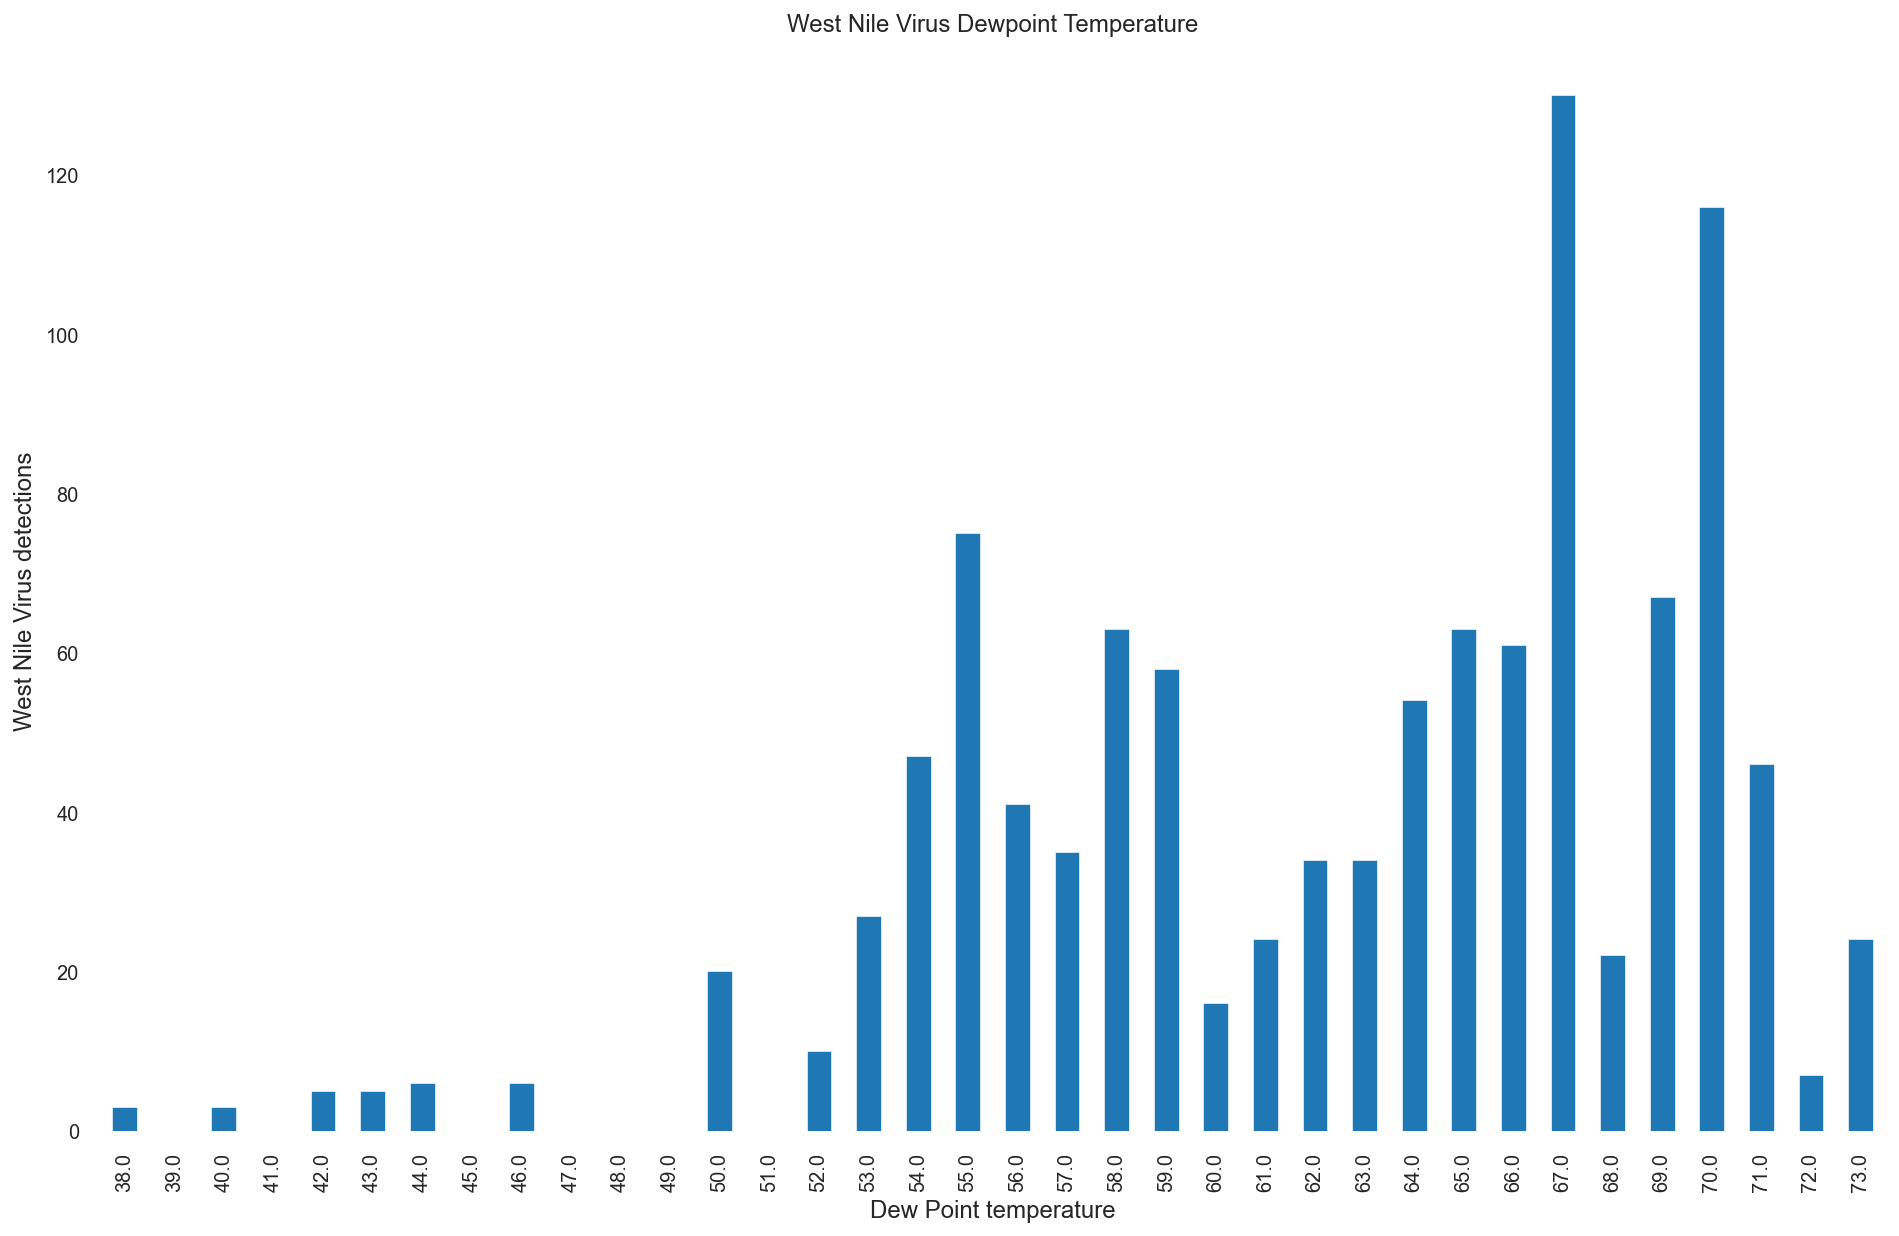

In [121]:
plt.figure(figsize = (16, 10))
train_weather.groupby(['dewpoint'])['wnvpresent'].sum().plot.bar()
plt.title("West Nile Virus Dewpoint Temperature", fontsize='large')
plt.xlabel("Dew Point temperature", fontsize ='large')
plt.xticks(rotation=90)
plt.ylabel("West Nile Virus detections ", fontsize='large'); 

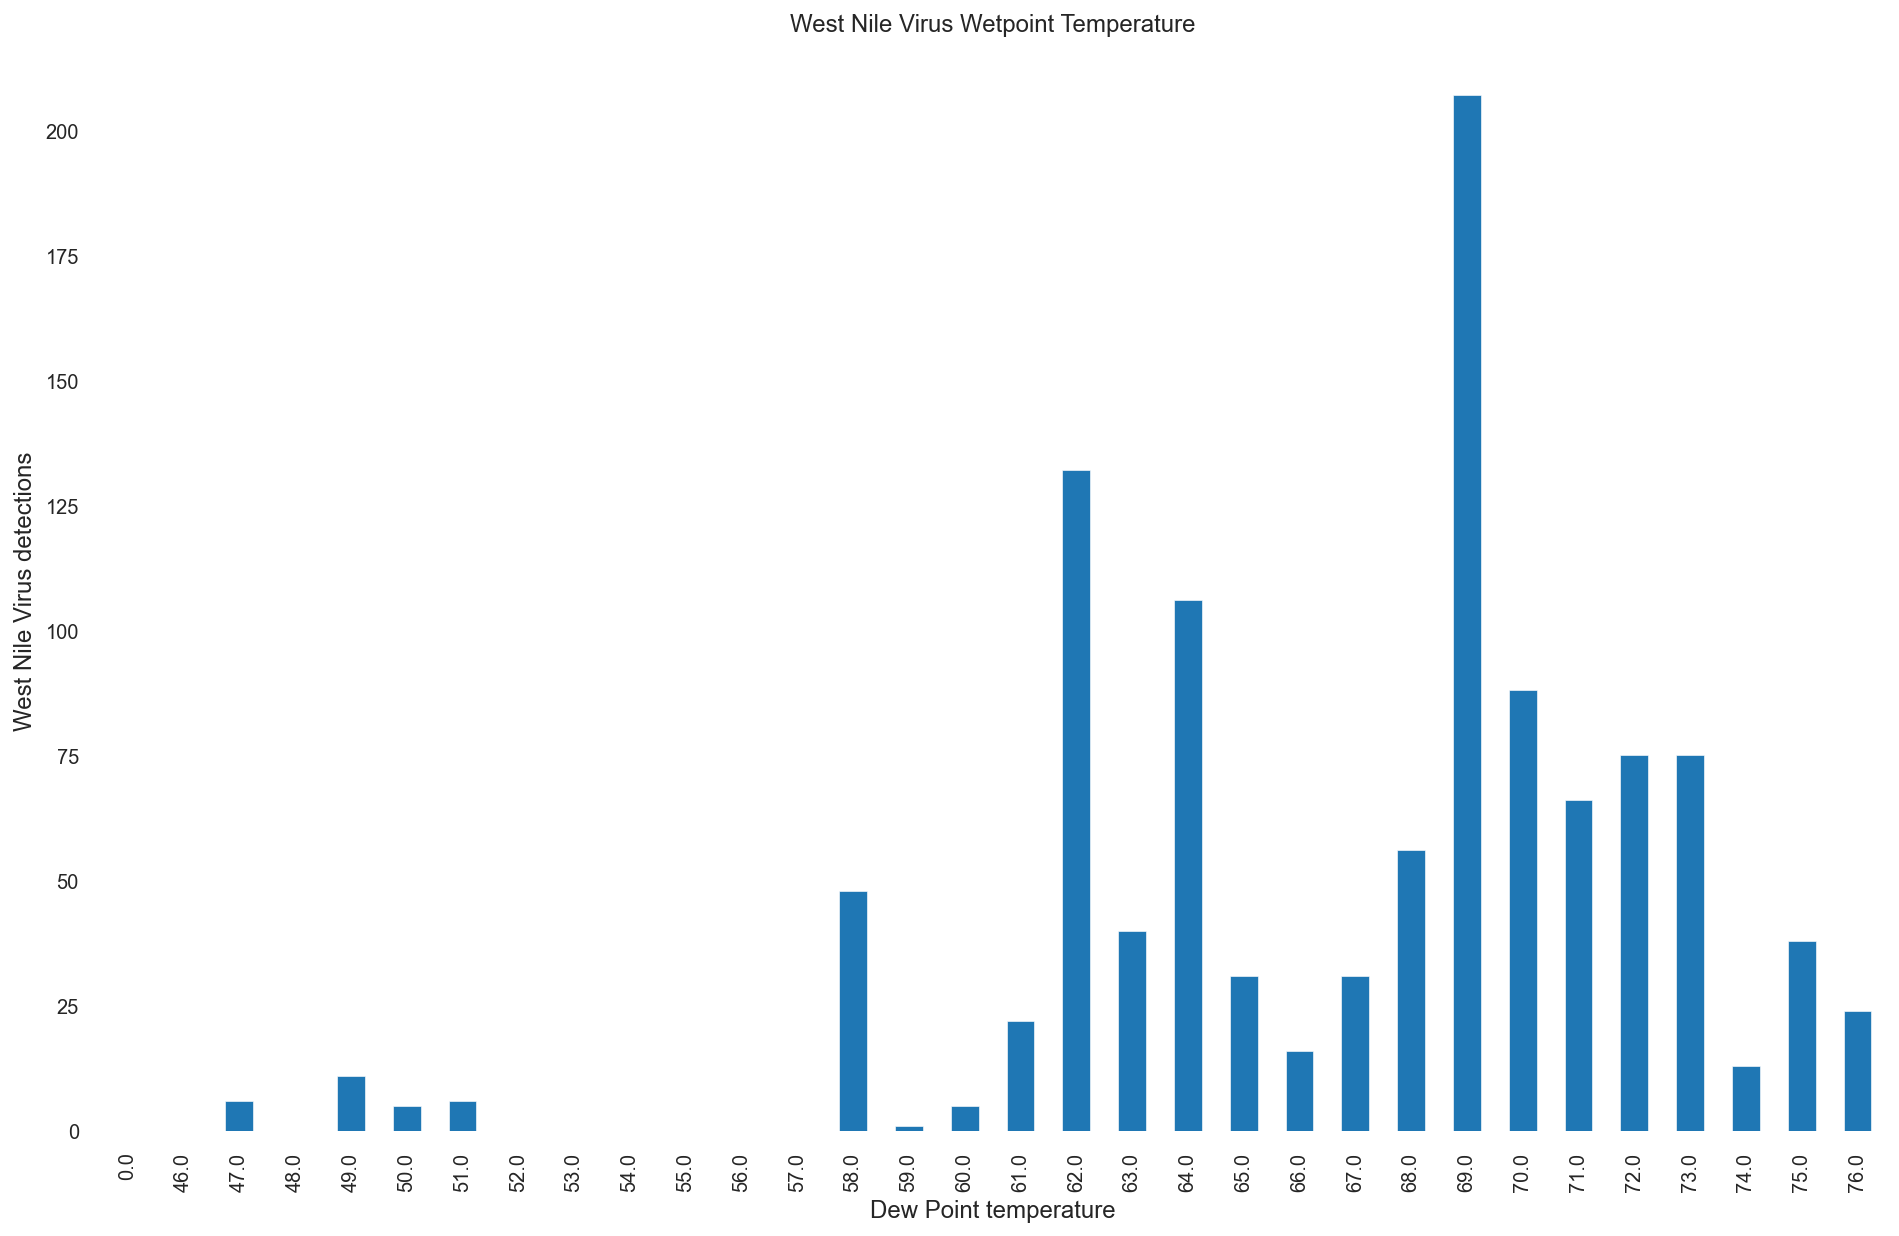

In [122]:
plt.figure(figsize = (16, 10))
train_weather.groupby(['wetbulb'])['wnvpresent'].sum().plot.bar()
plt.title("West Nile Virus Wetpoint Temperature", fontsize='large')
plt.xlabel("Dew Point temperature", fontsize ='large')
plt.xticks(rotation=90)
plt.ylabel("West Nile Virus detections ", fontsize='large'); 

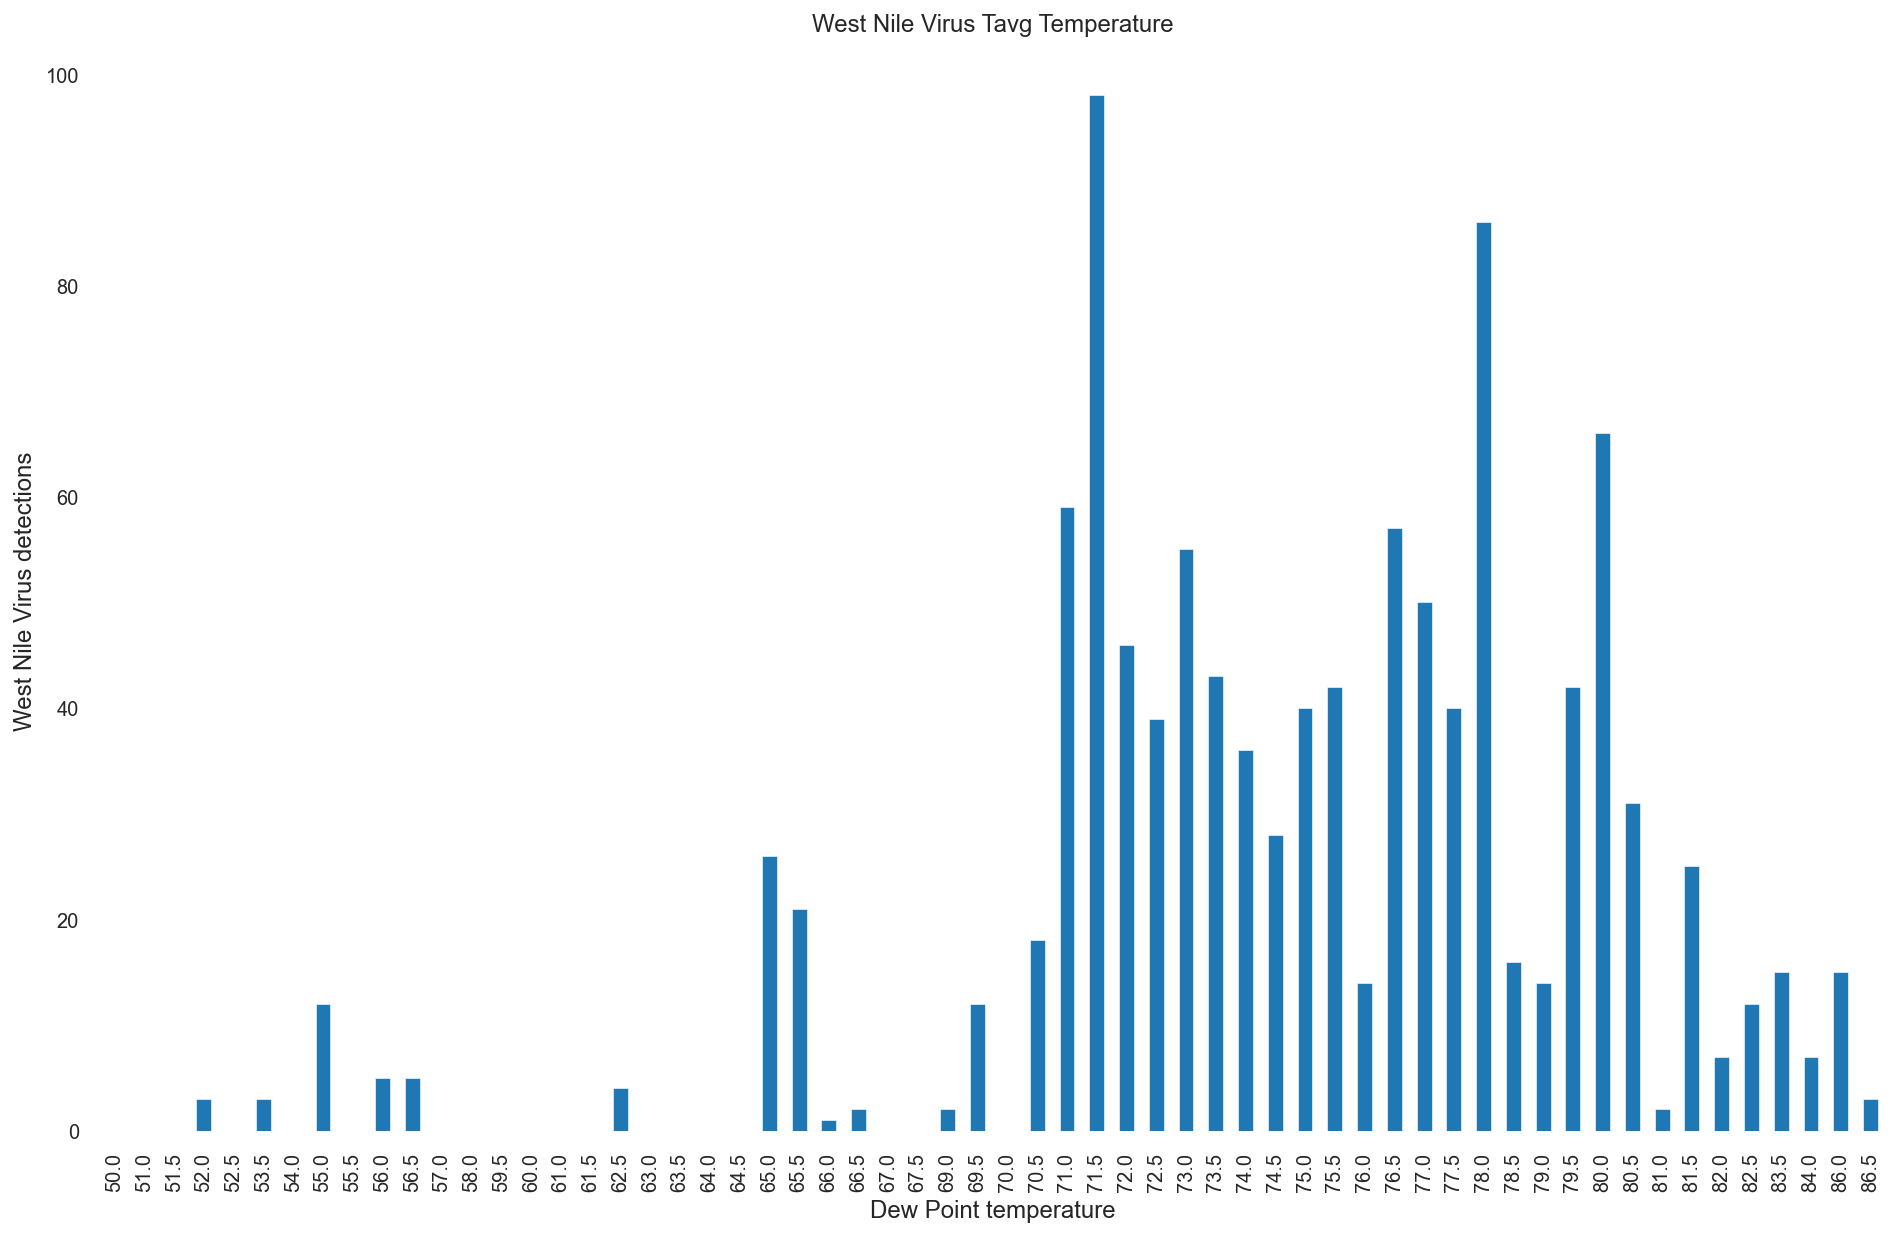

In [123]:
plt.figure(figsize = (16, 10))
train_weather.groupby(['tavg'])['wnvpresent'].sum().plot.bar()
plt.title("West Nile Virus Tavg Temperature", fontsize='large')
plt.xlabel("Dew Point temperature", fontsize ='large')
plt.xticks(rotation=90)
plt.ylabel("West Nile Virus detections ", fontsize='large'); 

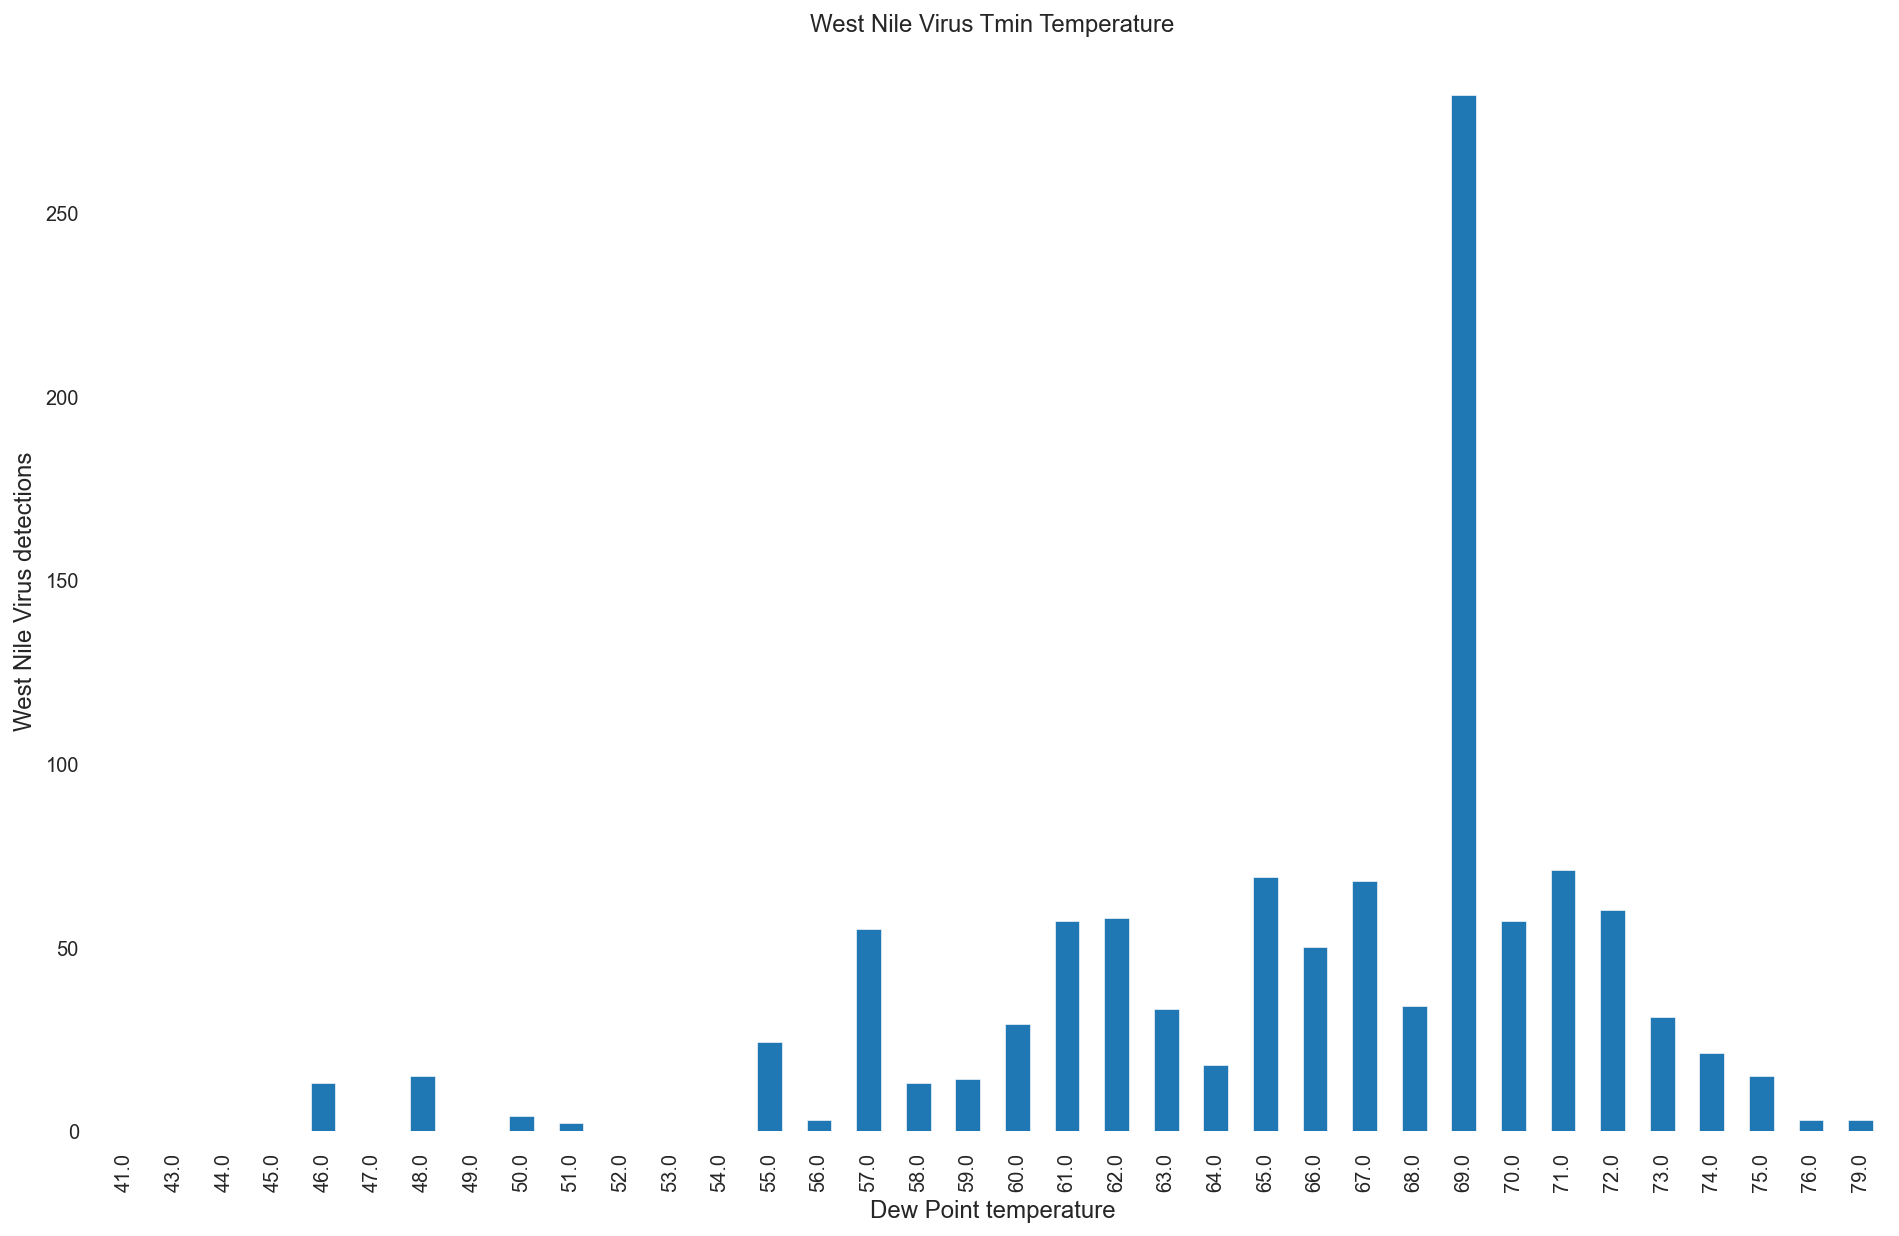

In [124]:
plt.figure(figsize = (16, 10))
train_weather.groupby(['tmin'])['wnvpresent'].sum().plot.bar()
plt.title("West Nile Virus Tmin Temperature", fontsize='large')
plt.xlabel("Dew Point temperature", fontsize ='large')
plt.xticks(rotation=90)
plt.ylabel("West Nile Virus detections ", fontsize='large'); 

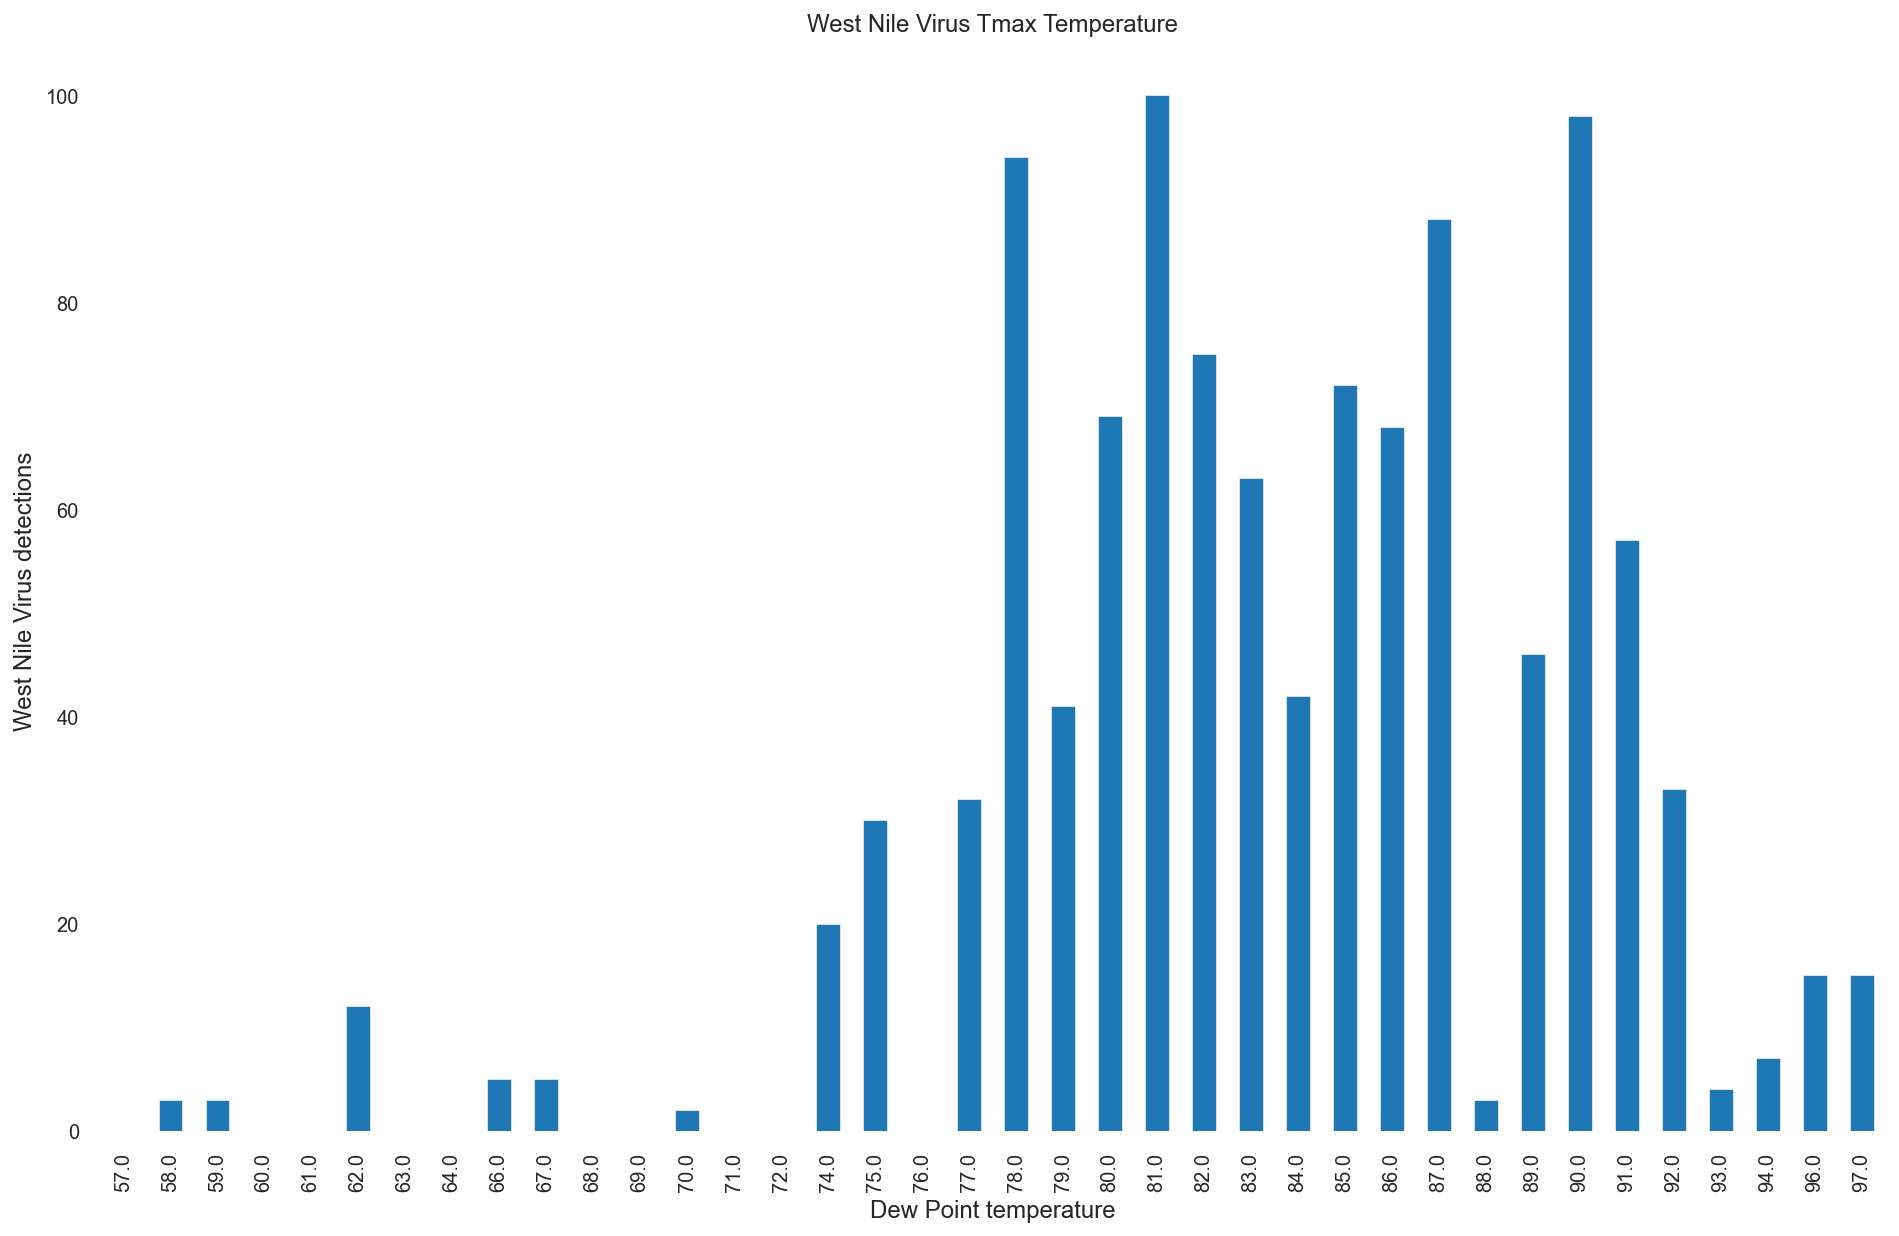

In [125]:
plt.figure(figsize = (16, 10))
train_weather.groupby(['tmax'])['wnvpresent'].sum().plot.bar()
plt.title("West Nile Virus Tmax Temperature", fontsize='large')
plt.xlabel("Dew Point temperature", fontsize ='large')
plt.xticks(rotation=90)
plt.ylabel("West Nile Virus detections ", fontsize='large'); 